# Part I - PISA Educational Data Exploration
## by Naji Halpern

## Introduction
> The PISA data set is an internation collection of education system data. This particular set was collected in 2012. It contains exam scores in the subjects of Math, Literacy, and Science and is expressed in Plausible Values. The data also includes questions that students answered about their home life, school structure, and personal perceptions.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
%matplotlib inline

> Here I will be loading my data and trying to explore these general questions:
-What are the columns in the table?<br>
-What sort of datatypes are each column?<br>
-What could be some independent and dependent variables I can identify?<br>


In [ ]:
df = pd.read_csv('pisa2012.csv', encoding='iso-8859-1')
df

### What is the structure of your dataset?

> The dataset is an international collection of student acheivment in math, reading and science. Each row represents a student and the columns include information of geography, home life, school details, subjective perception, family details, and test score related data.

### What is/are the main feature(s) of interest in your dataset?

> I'm mostly interested in math performance, as I see math as the most universal and objective subject of the three. Specifically, I'd like to explore how math performance is impacted by variables related to  instuctional practices at school and personal perceptions across in the United States.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I plan to use the plausible values in math as the dependent variable and explore columns in the following categories


>Personal Perceptions: ST29Q04, ST29Q05, ST42Q02 (As a note, I chose ST42Q02 because I'm more interested in a subjective opion as to whether the student thinks they are good at math rather than if they think they get good grades in math), ST43Q01

>School Structure: ST79Q01, ST79Q10, ST79Q12, ST80Q01, ST80Q08,
ST80Q09
ST80Q10

## Univariate Exploration

>This exploration will be broken into two categories of univariate count plots for school structure variables and student perception variables.


In [3]:
#create new data frame with only data from the US
df_us = df[df['CNT'] == 'United States of America']

#test
df_us['CNT'].unique()

array(['United States of America'], dtype=object)

### How are the different self perception variables distributed in the United States?
>The following are the distributions of how students report their perception of the following questions:<br> 1. Do you enjoy math? <br> 2. Is mathematics a worthwhile career choice? <br> 3. Are you bad at math? <br> 4. If you put in enough effort, can you succeed?

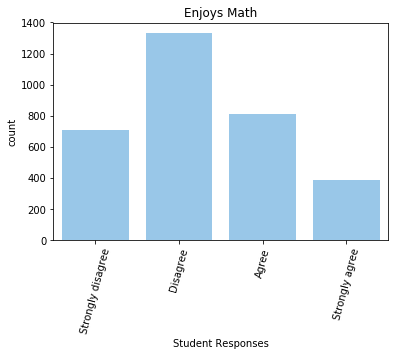

In [4]:
#Create a count plot of the distribution of how students enjoy math

#Order the categorical variables from strongly disagree to strongly agree as these are ordinal variables
x_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']

g = sb.countplot(df_us['ST29Q04'], color = '#8cc9f5', order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'])
g.set_title("Enjoys Math")

#rotate labels for better legibility
g.set_xticklabels(x_order, rotation = 75)
plt.xlabel("Student Responses");

### Result
>This is a very important variable to explore, not just for addressing the key questions around how student self perception and confidence are related to performance, but this is an important indicator of how students feel about the subject in general. A major product of successful education is the skills of becoming a life long learner with critical thinking skills over mastery of content. Students who enjoy learning are much more likely to engage in life long learning.<br> Here we see that most students fall in the more neutral zones of disagree and agree, with the peak of the distribution in disagree.It is also clear that there are more students who do not enjoy math over enjoy. This is not a positive reflection on the state of student enjoyment of math. I will be curious to see the results of how enjoyment of math is correlated to performance, because if there is a strong correlation then we will learn that enjoying math is import for students to succeed and that we know most students in the US currently do not enjoy math.

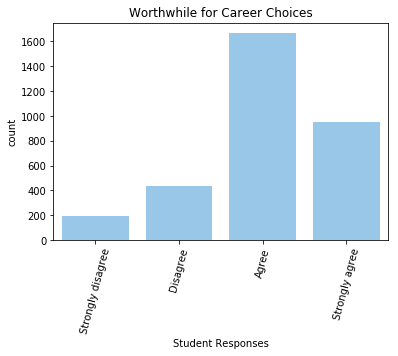

In [37]:
#create count plot

#set order of categories
x_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
g = sb.countplot(df_us['ST29Q05'], color = '#8cc9f5', order = x_order)
g.set_title("Worthwhile for Career Choices")
g.set_xticklabels(x_order, rotation = 75)
plt.xlabel("Student Responses");

### Result
>Here we see a more positive result compared to the degree that students enjoy math. There is a left skew to this data implying that the vast majority of students beleive that math is beneficial to their career outlook in the future. Having student "buy in" is very important to the success in their educational careers, just like having buy in is important for any adult in their own respective field. 

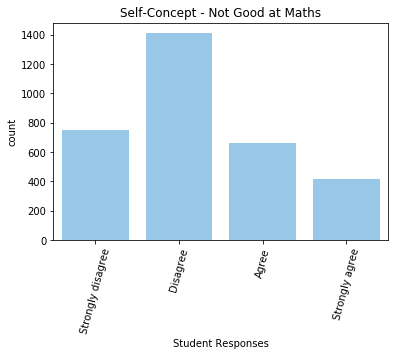

In [6]:
#create count plot

#set order of categories
x_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
g = sb.countplot(df_us['ST42Q02'], color = '#8cc9f5', order = x_order)
g.set_title("Self-Concept - Not Good at Maths")
g.set_xticklabels(x_order, rotation = 75)
plt.xlabel("Student Responses");

### Result
>Here we see another positive result, the large majority disagree that they are bad at math, and the next largest group reported strongly disagree. In other words, most students beleive they are good at math. This is very important for student success and self confidence. This can be thought of in the context of the four minute mile. For decades it was well accepted that running a four minute mile wa impossible, and for that time no one was able to do so. Then after the first four minute mile was acheived, many other runners were able to acheive the same thing. The idea is that if you think it's possible, that mindset can improve the probability of success.

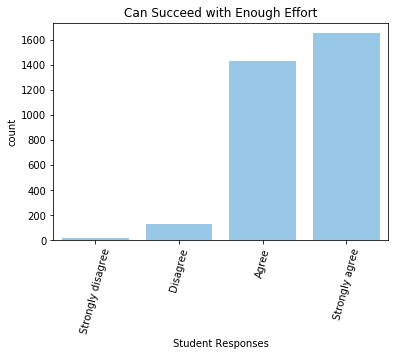

In [7]:
#create count plot

#set order of categories
x_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
g = sb.countplot(df_us['ST43Q01'], color = '#8cc9f5', order = x_order)
g.set_title("Can Succeed with Enough Effort")
g.set_xticklabels(x_order, rotation = 75)
plt.xlabel("Student Responses");

### Result
>Here we have a very similar question with a similar result. To what extent do students beleive that hard work will result in success. Here we see an even more positive result. There is a very strong left skew and the vast majority of students either strongly agree or agree. These variables are important to investigate because they have a tremendous impact not only on student performance but general well being. These variables are measures of students percetion about the world around them and their futures.

### Self perception results
>The results for self perception are very intersting. When it comes to enjoying math, there is a normal distribution, with a noteable peak at the 'dislike' response. Similarily the responses to 'are you bad at math' have a normal distibution with a slight right skew. When it comes to career choice and beleif in hard work there is a strong trend towards a positive perception. Meaning, the majority of students see mathematics as a good career skill and option and also beleive that they can suceed as long as they work hard enough. In the bivariate exploration, we'll examine how these attiudes correlate with math performance.

### How are the different school structure variables distributed in the United States?

>As with the variable exploration above, these are also categorical and ordinal, so each plot will have a reording of x labels

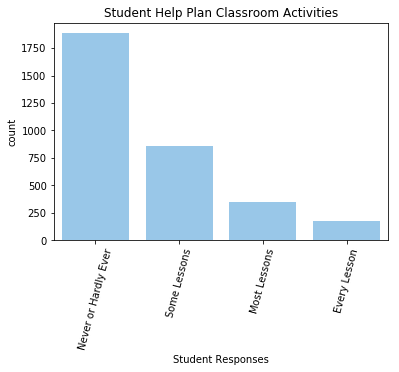

In [8]:
#Create a count plot of whether students help plan classroom acitivies
x_order = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
g = sb.countplot(df_us['ST79Q10'], color = '#8cc9f5', order = x_order)
g.set_title("Student Help Plan Classroom Activities")
g.set_xticklabels(x_order, rotation = 75)
plt.xlabel("Student Responses");

### Result
>Of the different instructional practice variables, this one is most interesting to me. It reflects a shift in new best practices. The idea is that when students have more autonomy and choice in how they learn, then they will learn more effectively because not only will they be more invested in their learning but this strategy also mimicks how natural learning will occur in adulthood outside the school environment. This is would fall heavily under the Montessori philosophy of education and runs counter to many  traditional pedagogical approachs that emphasize the importance of structured learning coming from a well trained educator. This plot indicates that the adoption of this strategy is still slow as there is a heavy right skew and the majority of the distribution is in the "some lessons" and "never or hardely ever"

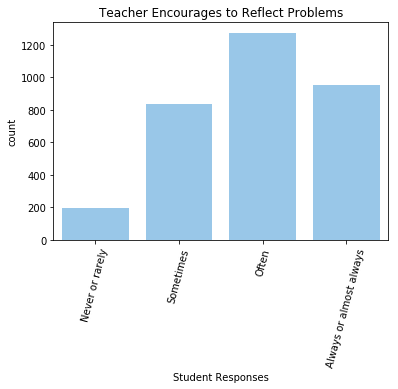

In [9]:
#Create count plot
x_order = ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
g = sb.countplot(df_us['ST80Q01'], color = '#8cc9f5', order = x_order)
g.set_title("Teacher Encourages to Reflect Problems")
g.set_xticklabels(x_order, rotation = 75)
plt.xlabel("Student Responses");

### Result
>Out of the other school structure plots, this one most closely resembles a normal distribution. However there is still broader adpotion of this strategy versus never or rarely. Here we examine how often teachers encourage students to reflect on the problems they have solved or are in the middle of solving. This emphasizes students own critical thinking skills over the importance of just getting the answer right.

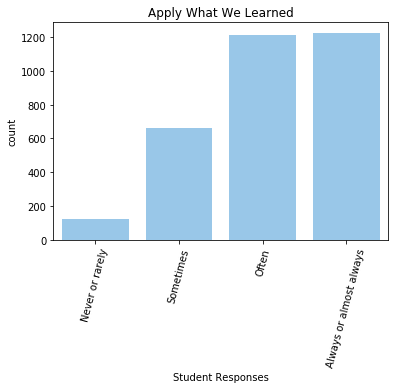

In [10]:
#Create count plot
x_order = ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
g = sb.countplot(df_us['ST80Q10'], color = '#8cc9f5', order = x_order)
g.set_title("Apply What We Learned")
g.set_xticklabels(x_order, rotation = 75)
plt.xlabel("Student Responses");

### Result
>This variable measures how students perceive the frequency that they get to apply what they have learned. This is very important as students who feel like they have received instruction but never get the opportunity to apply the concepts typically interpret the content as unimportant. In this plot we can see that a very strong instance of application of learned material which is another strong indicator that teachers are implementing best practices.

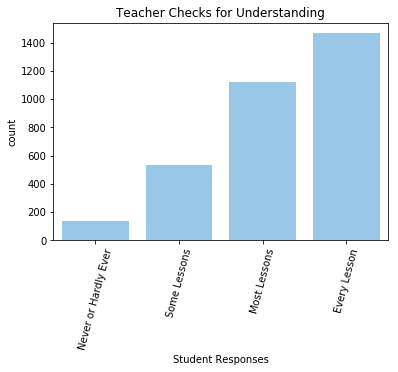

In [11]:
#Create count plot
x_order = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
g = sb.countplot(df_us['ST79Q06'], color = '#8cc9f5', order = x_order)
g.set_title("Teacher Checks for Understanding")
g.set_xticklabels(x_order, rotation = 75)
plt.xlabel("Student Responses");

### Result
>The frequency of teachers checking for understanding is a long lived teaching best practice. The idea is that checking for understanding frequently is vital to informing the instructional proccess. In order for teachers to make quality decisions on curriculum, pacing, and instructional delivery, teachers need to understand how well the material is being mastered through frequent checks for understanding. In this plot we can see that once again the majority of teachers are implementing this best practice.

### School Structure Results

>In the first variable exploration we see a very heavy right skew, indicating that most students in the United States do not have much or any opportunity to help plan class activities. The next variable explores if students feel that their teacher encourages students to reflect on problems, and there is a heavy majority that feel that their teachers do this often. The last two variables have an even heavier skew toward most often and almost always in regards to if students feel that they get the opportunity to apply what they have learned and whether their teacher checks for understanding.

### How are the math exam results distributed in the United States?


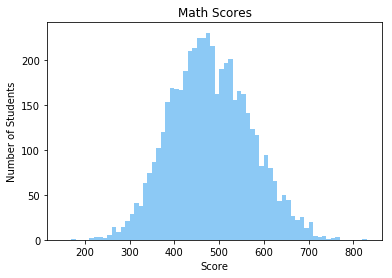

In [12]:
#Create a count plot of math scores

#perform transformation on the bins of the x axis to display the detail concentrated at the center
score_bins = np.arange(150, df_us['PV1MATH'].max()+10, 10)
plt.hist(data = df_us, x = 'PV1MATH', bins = score_bins, color = '#8cc9f5')
plt.title('Math Scores')
plt.xlabel('Score')
plt.ylabel('Number of Students');

### Results

>Here we see a very normal distribution of scores. The original plot was exteremly concentrated in the middle that a significant amount of detail was lost, that is why I applied a scale transformation of the bins on the x axis.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As reported in the result sections above, there was a mix of normal and skewed distributions. The variables in the self perception category had more normal distributions, while the school structure had more skewed distributions. I performed a transformation on the x axis of the scores table. There was a strong concentration of scores in the center and the x axis bin edges were far apart, concealing a large amount of detail.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> All of the categorical variables were in alphabetical order, when all of them are ordinal representing a value on a scale. For all the countplots I reordered the variables so the general trend in sentiment and structure could be seen visually.

## Bivariate Exploration

>How does each categorical value relate to math exam results?

### Self Perception Variables

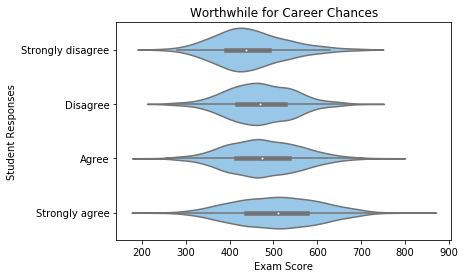

In [13]:
#create violin plot with ordered categories
x_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
#transform violin plot orientation
g = sb.violinplot(data = df_us, x = 'PV1MATH', y = 'ST29Q05', order = x_order, color = '#8cc9f5', orient = 'h')
g.set_title("Worthwhile for Career Chances")
plt.xlabel("Exam Score")
plt.ylabel("Student Responses");
#plt.ylim(300, 700);

### Result
>Now we are investigating how these different variables relate to math performance. In this first violinplot we examine how students' perception of whether math skills will be important for their career outlook and how that perception might translate to math scores. Starting with the white dots in the middle which represent average, we see that the more they beleive in the importance of math from a career standpoint, the higher the average score, and we also see that the highest scores in the distribution all belong to those students who strongly agree.

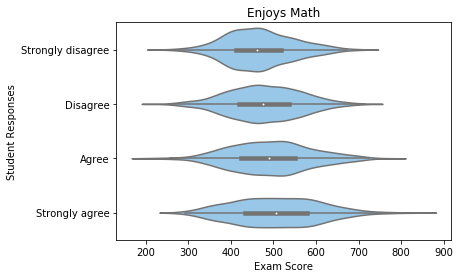

In [14]:
#create violin plot with ordered categories
#transform violin plot orientation
x_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
g = sb.violinplot(data = df_us, x = 'PV1MATH', y = 'ST29Q04', order = x_order, color = '#8cc9f5')
g.set_title("Enjoys Math")
plt.xlabel("Exam Score")
plt.ylabel("Student Responses");

### Result
>As in the plot above, the pattern is the same but less pronounced. The average scores appear to increase as students report increasing enjoyment, but the increase is subtle. There is also an interesting concentration of scores for students who report they strongly dislike math, which can be seen by the large width and short length of the violin.

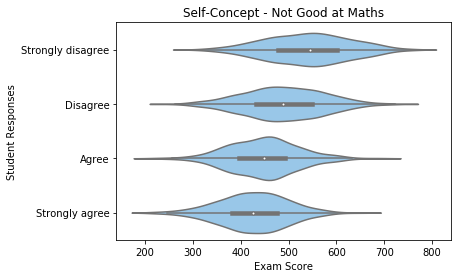

In [15]:
#create violin plot with ordered categories
#transform violin plot orientation
x_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
g = sb.violinplot(data = df_us, x = 'PV1MATH', y = 'ST42Q02', order = x_order, color = '#8cc9f5')
g.set_title("Self-Concept - Not Good at Maths")
plt.xlabel("Exam Score")
plt.ylabel("Student Responses");

### Result
>In this plot we examine how students perceive their own math performance. Like the plot before there is a correlation where students who beleive they are not good at math perform lower on average, and their scores are also concentrated in one area.

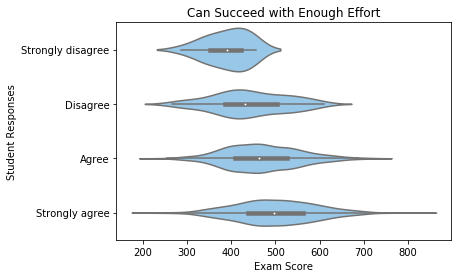

In [16]:
#create violin plot with ordered categories
#transform violin plot orientation
x_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
g = sb.violinplot(data = df_us, x = 'PV1MATH', y = 'ST43Q01', order = x_order, color = '#8cc9f5')
g.set_title("Can Succeed with Enough Effort")
plt.xlabel("Exam Score")
plt.ylabel("Student Responses");

### Result
>This plot measures the perception of how hard work can lead to success. Once again we see that students who strongly agree hold the highest score and the highest average scores. These variables are confirming the correlation and thus the importance of building student confidence, optimism, and buy in.

### School Structure Variables

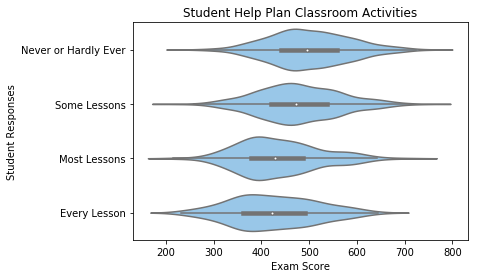

In [17]:
#create violin plot with ordered categories
#transform violin plot orientation
x_order = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
g = sb.violinplot(data = df_us, x = 'PV1MATH', y = 'ST79Q10', order = x_order, color = '#8cc9f5')
g.set_title("Student Help Plan Classroom Activities")
plt.xlabel("Exam Score")
plt.ylabel("Student Responses");

### Result
>Here we have our first school structure variable in relation to math scores. This is that contraversial teaching prractice where students are given more control of their learning activites. There is a very clear correlation here that suggests the more control students have over their learning, the lower their math scores are. This is very interesting and important, as this progressive movement in education is gaining more traction. It should be noted that this is one data measure from one study in one country applied to one subject. So to say that this proves the Montessori model leads to lower performance is inaccurate, but rather brings into consideration the opportunity for more research.

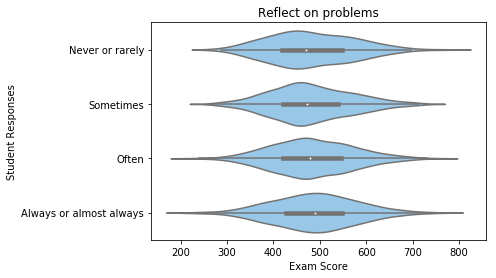

In [18]:
#create violin plot with ordered categories
#transform violin plot orientation
x_order = ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
g = sb.violinplot(data = df_us, x = 'PV1MATH', y = 'ST80Q01', order = x_order, color = '#8cc9f5')
g.set_title("Reflect on problems")

plt.xlabel("Exam Score")
plt.ylabel("Student Responses");

### Result
>These violin plots look almost identical. There seems to be a slight correlation in average scores rising with higher frequency of student reflection, however the shape, size, interquartile ranges and concentrations look very similar.

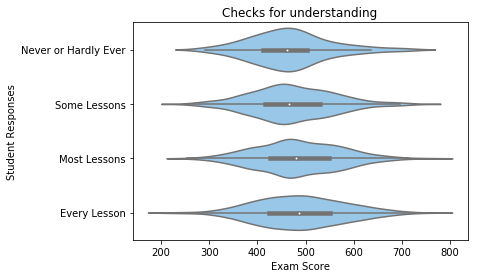

In [19]:
#create violin plot with ordered categories
#transform violin plot orientation
x_order = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
g = sb.violinplot(data = df_us, x = 'PV1MATH', y = 'ST79Q06', order = x_order, color = '#8cc9f5')
g.set_title("Checks for understanding")
plt.xlabel("Exam Score")
plt.ylabel("Student Responses");

### Result
>Similar to the previous plot, this plot indicates a subtle correlation in the average score to the frequency of teacher checks for understanding. The overall area does suggest a strong correlation than was seen previously suggesting that in fact the frequency of teacher checks for understanding can increase student performance. This is a piece of evidence confirming the long lived practice.

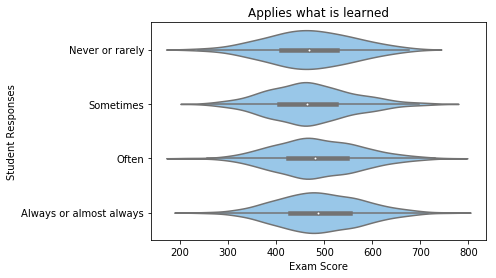

In [22]:
#create violin plot with ordered categories
#transform violin plot orientation
x_order = ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
g = sb.violinplot(data = df_us, x = 'PV1MATH', y = 'ST80Q10', order = x_order, color = '#8cc9f5')
g.set_title("Applies what is learned")
plt.xlabel("Exam Score")
plt.ylabel("Student Responses");

### Result
>In this plot we see the correlation of scores to how frequent do students apply the concepts they learn. The result is that there is a strong correlation among the averages, suggesting that if students feel they apply what they learn they are more likely on average to score higher.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are strong similarities in the group of self perception variables. The more optimistic responses consitently hold the highest maximum math score value as well as the higher averages, although the difference in averages seem less pronounced. As for the school structure group of variables There also seems to be a higher overal score asociated with instructional best practices for three out of the four variables. The inverse seems to be true for the variable "students help create activities". The more often students are invovled in planning, the over all lower the scores.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In most of the variables the more optimistic answers as well as the instructional best practices not only correlate with over all higher scores, but also have a much larger spread of scores. It is also interesting that the self percetion variables tend to have a smaller interquartile range as compared to the school structure variables.

### Multivariate
>In this multivariate exploration, we will examine trend lines of multiple variables and their relationship to math exam scores. First they will be broken down by their respective categorical group, then they will be averaged out by group into one plot. This will give us a good visua understaning of how strongly correlated these variables are by the direction and steepness of the line plots. Having all the lines together in their group plots may also show us information we did not expect.



In [ ]:
#create series objects of the average scores corresponding to each student response
enjoys_math = df_us.groupby('ST29Q04')['PV1MATH'].mean()
career_outlook = df_us.groupby('ST29Q05')['PV1MATH'].mean()
bad_at_math = df_us.groupby('ST42Q02')['PV1MATH'].mean()
can_succeed = df_us.groupby('ST43Q01')['PV1MATH'].mean()

#create a new dataframe of perceptions questions
perceptions = pd.DataFrame({'enjoys_math': enjoys_math,
                            'career_outlook': career_outlook,
                            'bad_at_math': bad_at_math,
                            'can_succeed': can_succeed}, index=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'])



In [24]:
perceptions

,enjoys_math,career_outlook,bad_at_math,can_succeed
Strongly disagree,467.141894,446.426524,539.540373,391.208541
Disagree,478.408254,470.028164,488.856799,441.114721
Agree,492.523961,476.164040,447.108192,468.669209
Strongly agree,506.705239,507.098581,425.602886,499.415975


In [25]:
#function to create a new dataframe from the average scores of each student response
def new_df(df_dict):
    result = {}
    for key, value in df_dict.items():
        result[key] = df_us.groupby(value)['PV1MATH'].mean()
    return result



### Student Perceptions

In [26]:
#create data frame based on student perception questions
df_dict = {'enjoys_math': 'ST29Q04', 'career_outlook': 'ST29Q05', 'bad_at_math': 'ST42Q02', 'can_succeed': 'ST43Q01'}
new_index=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
perceptions = pd.DataFrame(new_df(df_dict)).reindex(new_index)
perceptions

,enjoys_math,career_outlook,bad_at_math,can_succeed
Strongly disagree,467.141894,446.426524,539.540373,391.208541
Disagree,478.408254,470.028164,488.856799,441.114721
Agree,492.523961,476.164040,447.108192,468.669209
Strongly agree,506.705239,507.098581,425.602886,499.415975


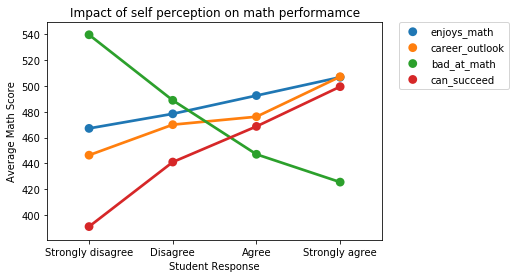

In [27]:
melted = pd.melt(perceptions.reset_index(), id_vars=['index'], value_vars = ['enjoys_math', 'career_outlook', 'bad_at_math', 'can_succeed'])
g = sb.pointplot(x='index', y='value', hue='variable', data=melted)
plt.title('Impact of self perception on math performamce')
plt.xlabel('Student Response')
plt.ylabel('Average Math Score')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


### Result
>There are some very interesting pieces of visual information in this plot. Before diving into those, it is very clear that the "bad at math" variable is has an inverse relationship and is also inversely worded as a question. It is the only question proposed in the negation, so in the following cells I will perform an inverse to the data to reflect the data more accurately.

In [28]:
#reverse the 'bad at math' column to reflect good_at_math
perceptions_altered = perceptions.copy()
perceptions_altered['bad_at_math'] = perceptions_altered['bad_at_math'].sort_values(ascending= True).values
perceptions_altered = perceptions_altered.rename(columns={'bad_at_math': 'good_at_math'})
perceptions_altered

,enjoys_math,career_outlook,good_at_math,can_succeed
Strongly disagree,467.141894,446.426524,425.602886,391.208541
Disagree,478.408254,470.028164,447.108192,441.114721
Agree,492.523961,476.164040,488.856799,468.669209
Strongly agree,506.705239,507.098581,539.540373,499.415975


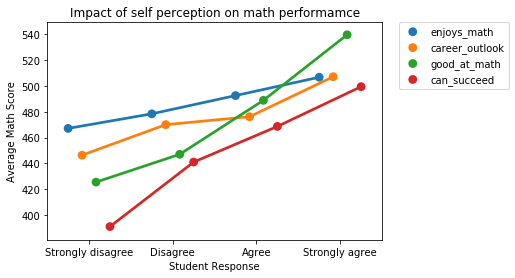

In [29]:
melted = pd.melt(perceptions_altered.reset_index(), id_vars=['index'], value_vars = ['enjoys_math', 'career_outlook', 'good_at_math', 'can_succeed'])

#add dodge to allow for better visibility
g = sb.pointplot(x='index', y='value', hue='variable', data=melted, dodge = .5)
plt.title('Impact of self perception on math performamce')
plt.xlabel('Student Response')
plt.ylabel('Average Math Score')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


### Result
>    As depicted in the visual, we can see the trend of optimism in regards to student self perception in relation to math exam performance. What we are looking for here is the slope and overal trend between optimism and higher test scores. There are four variables depicted by one line each. The first is the degree to which the student enjoys math. This variable has a smooth and consistent correlation with a relatively small change from minimum to maximum value compared to the others. It does indicate that a student who reports being good at math is correlated with higher math scores. The next variable explores whether math is a strong skill a realistic career outlook for the student. This has a positive correlation overall but students who disagreed scored higher on average than those who agree. Next is whether the student beleives they are good at math. This variable has the strongest correlation and seems to confirm the old adage "whether you think you can or think you can't, you are right". Finally the last variable is how students reported whether hard work will result in success. The optimism of this perception also had a very strong correlation.


### Class structure

In [30]:
#rename similar response options to be identical
name_dict = {'Never or Hardly Ever' : 'Never or rarely', 'Some Lessons':  'Sometimes', 'Most Lessons': 'Often', 'Every Lesson': 'Always or almost always'}
df_us['ST79Q10'] = df_us['ST79Q10'].apply(lambda x: name_dict[x] if x in name_dict else x)
df_us['ST79Q06'] = df_us['ST79Q06'].apply(lambda x: name_dict[x] if x in name_dict else x)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
#create new dataframe for class structure responses
df_dict = {'reflect_on_problems': 'ST80Q01', 'checks_for_understanding' : 'ST79Q06', 'students_plan_act': 'ST79Q10', 'applies_content': 'ST80Q10'}
new_index= ['Never or rarely', 'Sometimes', 'Often', 'Always or almost always']
structure = pd.DataFrame(new_df(df_dict)).reindex(new_index)
structure = structure.dropna()
structure

,reflect_on_problems,checks_for_understanding,students_plan_act,applies_content
Never or rarely,481.950229,466.205914,500.114345,470.522196
Sometimes,480.214007,472.237936,478.001354,469.922499
Often,483.252689,485.157320,435.599530,485.663201
Always or almost always,488.812078,488.410917,425.653879,491.601480


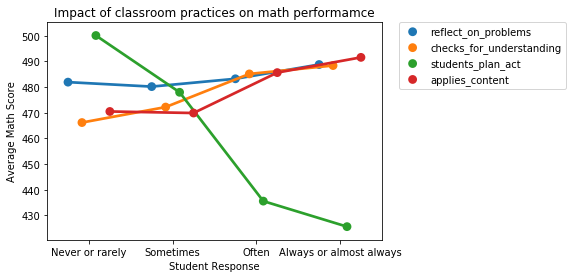

In [32]:
melted = pd.melt(structure.reset_index(), id_vars=['index'], value_vars = ['reflect_on_problems', 'checks_for_understanding', 'students_plan_act', 'applies_content'])

#add dodge to allow for better visibility
g = sb.pointplot(x='index', y='value', hue='variable', data=melted, dodge = .5)
plt.title('Impact of classroom practices on math performamce')
plt.xlabel('Student Response')
plt.ylabel('Average Math Score')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


>An inverse will also be performed here to reflect the teaching practice of "teachers plan student activities"

In [33]:
#reverse the 'students plan activities' column to reflect 'teacher plans activities'
structure_altered = structure.copy()
structure_altered['students_plan_act'] = structure_altered['students_plan_act'].sort_values(ascending= True).values
structure_altered = structure_altered.rename(columns={'students_plan_act': 'teacher_plans_act'})
structure_altered

,reflect_on_problems,checks_for_understanding,teacher_plans_act,applies_content
Never or rarely,481.950229,466.205914,425.653879,470.522196
Sometimes,480.214007,472.237936,435.599530,469.922499
Often,483.252689,485.157320,478.001354,485.663201
Always or almost always,488.812078,488.410917,500.114345,491.601480


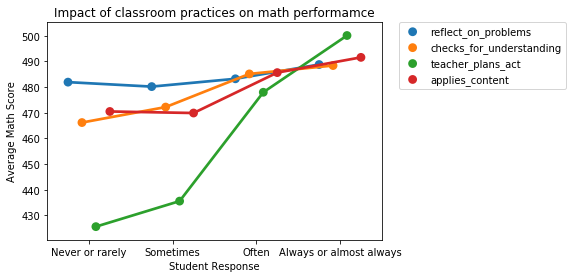

In [34]:
melted = pd.melt(structure_altered.reset_index(), id_vars=['index'], value_vars = ['reflect_on_problems', 'checks_for_understanding', 'teacher_plans_act', 'applies_content'])
g = sb.pointplot(x='index', y='value', hue='variable', data=melted, dodge = .5)
plt.title('Impact of classroom practices on math performamce')
plt.xlabel('Student Response')
plt.ylabel('Average Math Score')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);



### Result
>Here we are examining a similar set of relationships, only now we want to see how correlated are the accepted best practices in school instruction relative to performance on a math exam. In the visual you will see four variables each represented by one line with each point represnting the average score associated with the given response. The variables were questions the students answered including
1. Does the teacher have students reflect on problems?
2. Does the teacher check for understanding?
3. Is the teacher the one who plans all activities (instead of students planning activities)?
4. Do students have the opportunity to apply what they have learned?<br>
<br>With these variables, we see that three of them have a correlation that is almost identical. When examining those three it is of particular note, that once the data is beyond the "sometimes" response, the data overlapes so perfectly it is almost indistinguishable. However, there is a clear outlier. While each have a positive correlation, the variable where teachers are in charge of planning activies has an almost exponential correlation with test scores. Meaning the more the teacher is in charge, the higher we'd expect scores to be. This can be viewed as a hotly debated topic. Student autonomy in the classroom is a philisophical paradigm where traditional approaches avoid it and more recent progressive approaches embrace it. According to this table, this particular data suggests the traditional view is more correlated with higher scores.

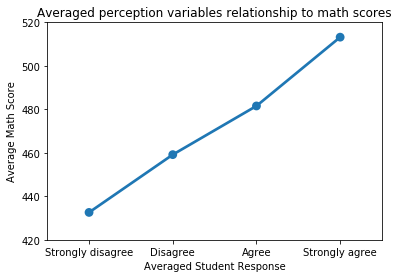

In [35]:
perceptions_altered['Average'] = perceptions_altered.mean(axis=1)
melted = pd.melt(perceptions_altered.reset_index(), id_vars=['index'], value_vars = ['Average'])
g = sb.pointplot(x='index', y='value', data=melted)
plt.title('Averaged perception variables relationship to math scores')
plt.xlabel('Averaged Student Response')
plt.ylabel('Average Math Score')
plt.ylim(420,520);


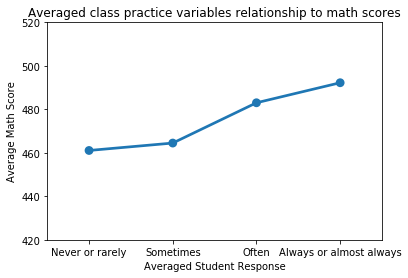

In [36]:
structure_altered['Average'] = structure_altered.mean(axis=1)
melted = pd.melt(structure_altered.reset_index(), id_vars=['index'], value_vars = ['Average'])
sb.pointplot(x='index', y='value', data=melted)
plt.title('Averaged class practice variables relationship to math scores')
plt.xlabel('Averaged Student Response')
plt.ylabel('Average Math Score')
plt.ylim(420,520);

### Result
>In the two plots above,the perception minimum is lower than the school structure minimum and the perception maximum is higher than the school structure maximum. There is a very strong correlation and consitent correlation in this group from point to point. In the school structure group there is a softer overall correlation but there is also a subtle change in slope over the course of the data points. It seems to suggest that whether a best practice is not used or only used sometimes does not have a significant correlation in higher test scores, but once a teacher is implementing best practices often or allways, that is where the strong correlation takes hold.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Self perception: The four point plots in the first table demonstrate a consistent positive correlation. A second table was created to inverse the question from "I am bad at math" to "I am good and math" and the reciprical of the data was applied so that the data was still valid. There we can see that that all four variables have a strong positive correlation, with the perception of being good at math having the strongest relationship to math performance. The variable of carrer outlook had a signifacnt strong increase compared to the other variables when moving from the agree data point to the strongly agree data point.

>School structure: An inverse was also taken in the group for the "students help plan activities" to "the teacher plans all activities". There is a general positive correlation amoung these variables, but here we see that three out of the four variables were shared an almost precise relationship. They were so similar that a dodge needed to be applied, particularily in the region bweteen "often" and "always" as there was an intersection of data in that region of the graph. 

>Averages: I also took the averages of the four variables in each group and set the y scale to be the same in order to compare the relationship of each variable group to the other. We can see that the there is a stronger correlation in self perception in both slope as well as minimum and maximum values.

### Were there any interesting or surprising interactions between features?

> The strong intersection of variables in the school structure group was very interesting. Examining this anaomoly indicates that the major changes happen when comparing the use of instructional practices "sometimes" versus "often" and there seems to be a uniform diminishing return between practices that are implemented "often" versus "always".

## Conclusions
>It becomes immeidetaly apparent by the slope of these two graphs, that there is a strong correlation between optimisim in self perception and math scores. The perception minimum is lower than the school structure minimum and the perception maximum is higher than the school structure maximum. There is a very strong correlation and consitent correlation in this group from point to point. In the school structure group there is a softer overall correlation but there is also a subtle change in slope over the course of the data points. It seems to suggest that whether a best practice is not used or only used sometimes does not have a significant correlation in higher test scores, but once a teacher is implementing best practices often or allways, that is where the strong correlation takes hold.

>Conclusions: <br>1. The highest scores were all consistently asociated with opptomistic self perception, but these optimistic perceptions also had the largest spread.<br>2. Averaging all of the self perception variables together yielded a stronger positive correlation between optimism and math scores versus the correlation between instructional best practices and math scores
